### Práctica 2: Identificación Datos Relevantes Proyecto Analítico


## 1.1 Introducción

A través de esta práctica se busca identificar los datos relevantes de un proyecto análitico; además hacer uso de las herramientas de integración, limpieza, validación y análisis de datos.

Se usa el entorno Jupyter (integrado en Anaconda) para llevar a cabo este caso de estudio. Se recurre a la aplicación de herramientas o librerías tales como:

- pandas
- matplotlib

## 1.2 Competencias a desarrollar

Por medio de esta práctica se busca desarrollar las habilidades o competencias requeridas por el Máster de Data Science de la UOC. En particular las habilidades son las siguientes:

- Capacidad de analizar un problema en el nivel de abstracción adecuado a cada situación y aplicar las habilidades y conocimientos adquiridos para abordarlo y resolverlo.
- Capacidad para aplicar las técnicas específicas de tratamiento de datos (integración, transformación, limpieza y validación) para su posterior análisis.

## 1.3 Objetivos

- Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco conocidos dentro de contextos más amplios o multidisciplinares.
- Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar a cabo un proyecto analítico.
- Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.
- Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el proceso analítico.
- Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de aplicación.
- Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en gran medida autodirigido o autónomo.
- Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.

# 2. Descripción de la práctica a realizar

## 2.1 Descripción del dataset

Se ha seleccionado el dataset de aplicaciones de la app store Google Play (https://www.kaggle.com/lava18/google-play-store-apps). Este conjunto de datos está compuesto por 13 columnas que representan diferentes atributos de las aplicaciones publicadas en la Play Sotre.

Se pueden enumerar y describir las siguientes columnas (atributos) de este dataset:

- **App**: Nombre de la aplicación.
- **Category**: Categoría a la que pertenece la aplicación.
- **Rating**: Calificación de la aplicación (entre 1.0 y 5.0)
- **Reviews**: Cantidad de opiniones de los usuarios.
- **Size**: Tamaño en megabytes de la aplicición.
- **Installs**: Cantidad de instalaciones de la aplicación.
- **Type**: Tipo de la aplicación.
- **Price**: Valor en doláres de la aplicación. 
- **Content Rating**: Categoría del contenido de la aplicación.
- **Genres**: Géneros a los que pertenece la aplicación.
- **Last Updated**: Fecha de la última aplicación.
- **Current Ver**: Versión actual de la aplicación.
- **Android Ver**: Versión de Android requerida y aceptada para la instalación de la aplicación.


## 2.2 Importancia y objetivos de los análisis

La información contenida en este dataset puede ayudar a validar **si** las variables diferentes a `Price`, tales como `Rating`, `Reviews`, `Installs`, entre otras, pueden ayudar a determinar el precio de una aplicación si ésta cambiara de tipo, es decir, de gratis a paga. Esta validación requerirà de un proceso de análisis de datos automatizado por medio de algoritmos de regresión lineal. Para ello será necesario considerar una variedad de registros importante para alcanzar el objetivo deseado.

Una empresa desarrolladora de software de aplicaciones móviles se puede ver interesada en cambiar su modelo de negocio para sus aplicaciones móviles. Lo anterior con el propósitode hacer una transición del tipo de aplicación. Esto va a permitir a la organización aumentar sus ingresos creando una versión pro (o premium) de su aplicación para usuarios que requieren mayor funcionalidad o características con capacidad ilimitada.


## 3.0 Limpieza de datos

Para empezar la limpieza de datos y otras operaciones requeridas, será necesario empezar con las tareas elementales.

### 3.0.1 Carga de librerías

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

### 3.1 Lectura de los datos

El primer paso consiste en cargar el archivo CSV `googleplaystore.csv` descargado desde Kaggle sobre un DataFrame:

In [3]:
apps = pd.read_csv('googleplaystore.csv')

### 3.1.1 Preview de los datos

Visualización de los primeros 20 datos en el DataFrame `apps`:

In [4]:
apps.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Visualización de los últimos 20 datos en el DataFrame `apps`:

In [5]:
apps.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


### 3.1.0 Características de esenciales de los datos:

Se visualiza a continuación las características esenciales del DataFrame: Nombre y tipo del índice por defecto, cantidad de registros, columnas (nombre, cantidad, tipo):

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Hasta aquí se observa que el DataFrame requiere que las columnas de interés - `Rating`, `Reviews`, `Installs`, `Price`- se les cambie el tipo de dato por un apto para el análisis.

Para lo anterior, será necesario que se haga una optimización de los tipos de datos. Por ejemplo para el precio -`Price`- será necesario cambiar a un numérico flotante de 32 bits.

### 3.1.1 Optimización de tipos de datos

In [7]:
apps.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 8.4 MB


Actualmente el DataFrame ocupa hasta 8.4 MB de memoria. Aunque esto no representa un problema para la capacidad de memoria de los sistemas de hoy en día, sí que debe ser una buena práctica de preoprocesamiento y limpieza, llevar a cabo una optimización sobre los tipos de datos adecuados para las columnas integrales.

Veamos un resumen del consumo de memoria por tipo de datos detectado en el dataframe:

In [8]:
for dtype in ['float', 'object']:
    selected_dtype = apps.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.04 MB
Average memory usage for object columns: 0.64 MB


Conversión de la columna a un flotante de 16 bits (2 bytes):

In [9]:
apps['Price'] = apps['Price'].str.replace('$', '')

In [10]:
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

In [11]:
apps['Price'] = pd.to_numeric(apps['Price'], downcast='float')

In [12]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10840 non-null float32
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float32(1), float64(1), object(11)
memory usage: 1.0+ MB


Se realiza la operación de downcating para la columna `Rating`:

In [13]:
apps['Rating'] = pd.to_numeric(apps['Rating'], downcast='float', errors='coerce')

In [14]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

In [15]:
apps['Reviews'] = apps['Reviews'].fillna(0)

In [16]:
apps['Reviews'] = apps['Reviews'].astype(np.int32)

In [17]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float32
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10840 non-null float32
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float32(2), int32(1), object(10)
memory usage: 974.1+ KB


Para la columna `Installs` se opta por remover el cáracter `+` del valor de la cantidad de instalaciones de la aplicación.

Luego se realizará la conversión a un entero de 64 bits sin signo:

In [18]:
apps['Installs'] = apps['Installs'].str.replace('+', '')

In [19]:
apps['Installs'] = apps['Installs'].str.replace(',', '')

In [20]:
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

In [21]:
apps['Installs'] = apps['Installs'].fillna(0)

In [22]:
apps['Installs'] = apps['Installs'].astype(np.int64)

In [23]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float32
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null int64
Type              10840 non-null object
Price             10840 non-null float32
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float32(2), int32(1), int64(1), object(9)
memory usage: 974.1+ KB


### 3.1.2 Establecimiento de valores por defecto

Para los valores faltantes (i.e., NaN) para las columnas `Rating`, `Reviews`, `Installs`, `Price` se dejará el valor el valor 0:

In [24]:
apps['Rating'] = apps['Rating'].fillna(0)

In [25]:
apps['Price'] = apps['Price'].fillna(0)

In [26]:
apps.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float32
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null int64
Type              10840 non-null object
Price             10841 non-null float32
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float32(2), int32(1), int64(1), object(9)
memory usage: 6.5 MB


Se evidencia una reducción alta y significativa en el espacio que ocupa el DataFrame `apps` en memoria de trabajo:

Antes: 8.4 MB
Actual: 6.5 MB

Una reducción aproximada del 23%.

### 3.1.3 Selección de las columnas de interés

Se trajará con las columnas de interés para este análisis:

- **App**: Nombre de la aplicación.
- **Rating**: Calificación de la aplicación (entre 1.0 y 5.0)
- **Reviews**: Cantidad de opiniones de los usuarios.
- **Installs**: Cantidad de instalaciones de la aplicación.
- **Price**: Valor en doláres de la aplicación.

Estas columnas permitirán hacer la estimación del precio de la aplicación basada en la aceptación y número de instalaciones, cantidad de opiniones de los usuarios.

In [27]:
apps_nuevo = apps[['App', 'Rating', 'Reviews', 'Installs', 'Price']]

In [28]:
apps_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 5 columns):
App         10841 non-null object
Rating      10841 non-null float32
Reviews     10841 non-null int32
Installs    10841 non-null int64
Price       10841 non-null float32
dtypes: float32(2), int32(1), int64(1), object(1)
memory usage: 296.5+ KB


Datos actuales en el DataFrame reducido (número de columnas):

In [29]:
apps_nuevo.head(20)

,App,Rating,Reviews,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0
1,Coloring book moana,3.9,967,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,0.0
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0
5,Paper flowers instructions,4.4,167,50000,0.0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,50000,0.0
7,Infinite Painter,4.1,36815,1000000,0.0
8,Garden Coloring Book,4.4,13791,1000000,0.0
9,Kids Paint Free - Drawing Fun,4.7,121,10000,0.0


## 3.2 Identificación y tratamiento de valores extremos (outliers)

Para la identificación de los valores extremos (o outliers) se opta por el uso de la unidad tipificada (o _Z-Score_, en inglés).

Este método consiste en hallar la diferencia entre un valor de la muestra y la media, y dividir ese resultado entre la desviación estándar.

In [30]:
def deteccion_valores_extremos(datos):
    umbral = 3

    media = np.mean(datos)
    desviacion_estandar = np.std(datos)
    unidades_tipificadas = [(y - media) / desviacion_estandar for y in datos]
    return np.where(np.abs(unidades_tipificadas) > umbral)

Valores extremos para la columna `Rating`:

In [31]:
deteccion_valores_extremos(apps_nuevo['Rating'].values)

(array([10472]),)

Valores extremos para la columna `Reviews`:

In [32]:
deteccion_valores_extremos(apps_nuevo['Reviews'].values)

(array([ 335,  336,  338,  342,  378,  381,  382,  385,  391,  403,  406,
         411,  420,  431,  467,  468,  474, 1654, 1655, 1660, 1662, 1670,
        1675, 1694, 1697, 1700, 1702, 1703, 1704, 1705, 1710, 1721, 1722,
        1739, 1750, 1751, 1755, 1764, 1842, 1844, 1869, 1871, 1872, 1878,
        1879, 1885, 1890, 1893, 1902, 1908, 1917, 1932, 1966, 1970, 2050,
        2090, 2544, 2545, 2550, 2603, 2604, 2610, 2611, 2808, 2853, 2884,
        3117, 3223, 3239, 3665, 3739, 3796, 3870, 3879, 3888, 3896, 3904,
        3908, 3909, 3910, 3928, 3943, 3953, 3971, 3975, 3986, 3987, 3994,
        3996, 4005, 4036, 4056, 4098, 4104, 4115, 4122, 4234, 4568, 4676,
        4688, 5395, 6449, 7536, 7937, 8894, 8896]),)

Valores extremos para la columna `Installs`:

In [33]:
deteccion_valores_extremos(apps_nuevo['Installs'].values)

(array([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,  381,
         382,  383,  385,  386,  391,  403,  411,  420,  431,  451,  464,
         465,  467,  468,  474,  865, 1654, 1655, 1661, 1662, 1700, 1702,
        1705, 1722, 1729, 1750, 1751, 1759, 1842, 1869, 1872, 1885, 1886,
        1908, 1917, 1920, 1966, 2544, 2545, 2546, 2550, 2554, 2603, 2604,
        2610, 2611, 2808, 2853, 2884, 3117, 3127, 3223, 3232, 3234, 3235,
        3255, 3265, 3326, 3450, 3454, 3473, 3476, 3522, 3523, 3533, 3562,
        3565, 3569, 3574, 3665, 3687, 3703, 3711, 3736, 3739, 3755, 3765,
        3767, 3796, 3816, 3819, 3870, 3879, 3888, 3896, 3904, 3907, 3909,
        3928, 3934, 3943, 3971, 3994, 3996, 4005, 4039, 4041, 4048, 4096,
        4098, 4104, 4105, 4115, 4122, 4144, 4147, 4150, 4153, 4170, 4222,
        4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844]),)

Para las columnas `Reviews` e `Installs` no es necesario realizar ningún tratamiento de valores extreamos a razón de que una app puede tener muy bajas o muy altas revisiones e intalaciones

Mientras que que la columna `Rating` tiene un valor extremo (10472) que puede distorsionar el cálculo de estadísticas descriptivas y visualización de datos.

In [34]:
apps_nuevo.loc[apps_nuevo['Rating'] > 5]

,App,Rating,Reviews,Installs,Price
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,0,0,0.0


In [35]:
apps_nuevo.iloc[10472]

App         Life Made WI-Fi Touchscreen Photo Frame
Rating                                           19
Reviews                                           0
Installs                                          0
Price                                             0
Name: 10472, dtype: object

El rating para la app _Life Made WI-Fi Touchscreen Photo Frame_ en este caso es de 19; la media debe estar entre 0.0 y 5.0.

Se modificará este valor para dejarlo en cero (0):

In [36]:
apps_nuevo.at[10472, 'Rating'] = 0

In [37]:
apps_nuevo.iloc[10472]

App         Life Made WI-Fi Touchscreen Photo Frame
Rating                                            0
Reviews                                           0
Installs                                          0
Price                                             0
Name: 10472, dtype: object

Guardado de los datos con la fase de limpieza realizada:

In [38]:
apps_nuevo.to_csv('googleplaystore_clean.csv', index=False)

# 4. Análisis de Datos

## 4.1 Selección de los grupos de datos a analizar

Sólo se seleccionaran las apps que no tienen precio.

In [39]:
apps_con_precio = apps_nuevo[apps_nuevo['Price'] > 0]

In [40]:
apps_con_precio.head(20)

,App,Rating,Reviews,Installs,Price
234,TurboScan: scan documents and receipts in PDF,4.7,11442,100000,4.99
235,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,100000,4.99
290,TurboScan: scan documents and receipts in PDF,4.7,11442,100000,4.99
291,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,100000,4.99
427,Puffin Browser Pro,4.0,18247,100000,3.99
476,"Moco+ - Chat, Meet People",4.2,1545,10000,3.99
477,Calculator,2.6,57,1000,6.99
478,Truth or Dare Pro,0.0,0,50,1.49
479,"Private Dating, Hide App- Blue for PrivacyHider",0.0,0,100,2.99
480,Ad Blocker for SayHi,0.0,4,100,3.99


In [41]:
apps_sin_precio = apps_nuevo[apps_nuevo['Price'] == 0.0]

In [42]:
apps_sin_precio.head(20)

,App,Rating,Reviews,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0
1,Coloring book moana,3.9,967,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,0.0
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0
5,Paper flowers instructions,4.4,167,50000,0.0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,50000,0.0
7,Infinite Painter,4.1,36815,1000000,0.0
8,Garden Coloring Book,4.4,13791,1000000,0.0
9,Kids Paint Free - Drawing Fun,4.7,121,10000,0.0


## 4.2 Comprobación de la normalidad y homogeneidad de la varianza


### 4.2.1 Comprobación normalidad

A través de la prueba de normalidad **Anderson-Darling** se comprobará que las variables identificadas cumplen con una distribución normal.

In [43]:
alfa = 0.05

for col in ['Rating', 'Reviews', 'Installs']:
    anderson = scipy.stats.anderson(apps_sin_precio[col][0:500])
    
    print('Variable: {} - Anderson -> Prueba Estadística: {} - p-valor: {}'.format(col, anderson[0], anderson[1][2]))

Variable: Rating - Anderson -> Prueba Estadística: 60.866851291363105 - p-valor: 0.781
Variable: Reviews - Anderson -> Prueba Estadística: 146.97147300083816 - p-valor: 0.781
Variable: Installs - Anderson -> Prueba Estadística: 147.15446905609326 - p-valor: 0.781


Se valida que todas las tres variables -`Rating`, `Reviews`, e `Installs`- siguen una una distribución normal: el p-valor es superior al nivel prefijado (0.05).

### 4.2.2 Comprobación de la homogeneidad de la varianza

Esta comprobación se realizará utilizando la prueba de Fligner-Killeen:

In [44]:
scipy.stats.fligner(apps_sin_precio['Rating'], apps_sin_precio['Reviews'], apps_sin_precio['Installs'])

FlignerResult(statistic=15121.580576857192, pvalue=0.0)

## 4.3 Aplicación de pruebas estadísticas para comparar los grupos de datos

### 4.3.1 ¿Cuál variable determina más el precio de una aplicación?

In [45]:
for col in ['Rating', 'Reviews', 'Installs']:
    rho, p_valor = scipy.stats.spearmanr(apps_con_precio[col], apps_con_precio['Price'])
    
    print('Variable: {} - Coeficiente de correlación: {} - p-valor: {}'.format(col, rho, p_valor))

Variable: Rating - Coeficiente de correlación: 0.003404096617411206 - p-valor: 0.9234156404940743
Variable: Reviews - Coeficiente de correlación: 0.12002642389343231 - p-valor: 0.0006692967576194765
Variable: Installs - Coeficiente de correlación: 0.13550902383530145 - p-valor: 0.00012078506029290597


Se puede observar que la variable `Installs` está más relacionada con el valor que tiene la aplicación. Está más cercano a +1.

### 4.3.2 ¿El número de instalaciones influye sobre el precio de una aplicación?

Se quiere validar si el número de instalaciones a partir de 100.000 (cien mil) inflouye sobre el precio de la aplicación.

Para lograr esta prueba se tomarán dos subconjuntos de datos:

- Apps con descargas inferior a 100.000
- Apps con descargar igual o superior a 100.000

In [46]:
apps_menor_100k = apps_con_precio[apps_con_precio['Installs'] < 100000]

In [47]:
apps_menor_100k.head()

,App,Rating,Reviews,Installs,Price
476,"Moco+ - Chat, Meet People",4.2,1545,10000,3.99
477,Calculator,2.6,57,1000,6.99
478,Truth or Dare Pro,0.0,0,50,1.49
479,"Private Dating, Hide App- Blue for PrivacyHider",0.0,0,100,2.99
480,Ad Blocker for SayHi,0.0,4,100,3.99


In [48]:
apps_mayor_igual_100k = apps_con_precio[apps_con_precio['Installs'] >= 100000]

In [49]:
apps_mayor_igual_100k.head()

,App,Rating,Reviews,Installs,Price
234,TurboScan: scan documents and receipts in PDF,4.7,11442,100000,4.99
235,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,100000,4.99
290,TurboScan: scan documents and receipts in PDF,4.7,11442,100000,4.99
291,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,100000,4.99
427,Puffin Browser Pro,4.0,18247,100000,3.99


In [50]:
scipy.stats.ttest_ind(apps_menor_100k['Price'], apps_mayor_igual_100k['Price'], equal_var=False)

Ttest_indResult(statistic=1.9397439036077468, pvalue=0.05335503065001087)

p-valor respecto al nivel de significación (0.05) es mayor.

Esto ayuda a concluir que el número de instalaciones no afecta el precio de la aplicación.

### 4.3.3 Modelo de regresión lineal

Se usarán diferente modelos para realizar la predicción del precio sobre los apps que no tienen precio asignado.

El modelo de predicción será el que mejor se ajuste a partir de las alternativas planteadas.

Modelo 1

In [51]:
apps_modelo1 = ols("Price ~ Rating", data=apps_con_precio).fit()

In [52]:
apps_modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7040
Date:                Sun, 06 Jan 2019   Prob (F-statistic):              0.402
Time:                        06:49:17   Log-Likelihood:                -4371.5
No. Observations:                 800   AIC:                             8747.
Df Residuals:                     798   BIC:                             8756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2696      4.474      3.860      0.000       8.487      26.052
Rating        -0.9705      1.157     -0.839      0.402      -3.241       1.300
==============================================================================
Omnibus:                      960.319   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55377.415
Skew:                           6.291   Prob(JB):                         0.00
Kurtosis:                      41.769   Cond. No.                         9.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
apps_modelo2 = ols("Price ~ Reviews", data=apps_con_precio).fit()

In [54]:
apps_modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1533
Date:                Sun, 06 Jan 2019   Prob (F-statistic):              0.695
Time:                        06:49:17   Log-Likelihood:                -4371.8
No. Observations:                 800   AIC:                             8748.
Df Residuals:                     798   BIC:                             8757.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9973      2.033      6.886      0.000      10.007      17.987
Reviews    -6.548e-06   1.67e-05     -0.392      0.695   -3.94e-05    2.63e-05
==============================================================================
Omnibus:                      959.933   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55219.313
Skew:                           6.287   Prob(JB):                         0.00
Kurtosis:                      41.710   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
apps_modelo3 = ols("Price ~ Installs", data=apps_con_precio).fit()

In [56]:
apps_modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3736
Date:                Sun, 06 Jan 2019   Prob (F-statistic):              0.541
Time:                        06:49:17   Log-Likelihood:                -4371.6
No. Observations:                 800   AIC:                             8747.
Df Residuals:                     798   BIC:                             8757.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0988      2.044      6.898      0.000      10.087      18.111
Installs   -1.951e-06   3.19e-06     -0.611      0.541   -8.22e-06    4.31e-06
==============================================================================
Omnibus:                      959.788   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55185.717
Skew:                           6.286   Prob(JB):                         0.00
Kurtosis:                      41.698   Cond. No.                     6.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
apps_modelo1.params

Intercept    17.269624
Rating       -0.970487
dtype: float64

In [58]:
apps_modelo2.params

Intercept    13.997276
Reviews      -0.000007
dtype: float64

In [59]:
apps_modelo3.params

Intercept    14.098756
Installs     -0.000002
dtype: float64

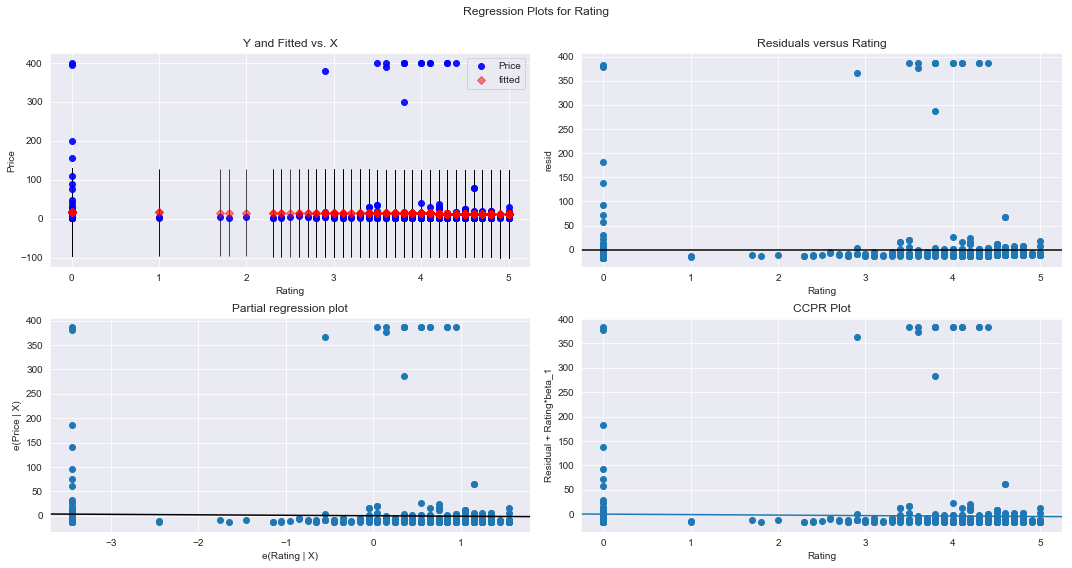

In [60]:
fig = plt.figure(figsize=(15,8))


fig = sm.graphics.plot_regress_exog(apps_modelo1, "Rating", fig=fig)

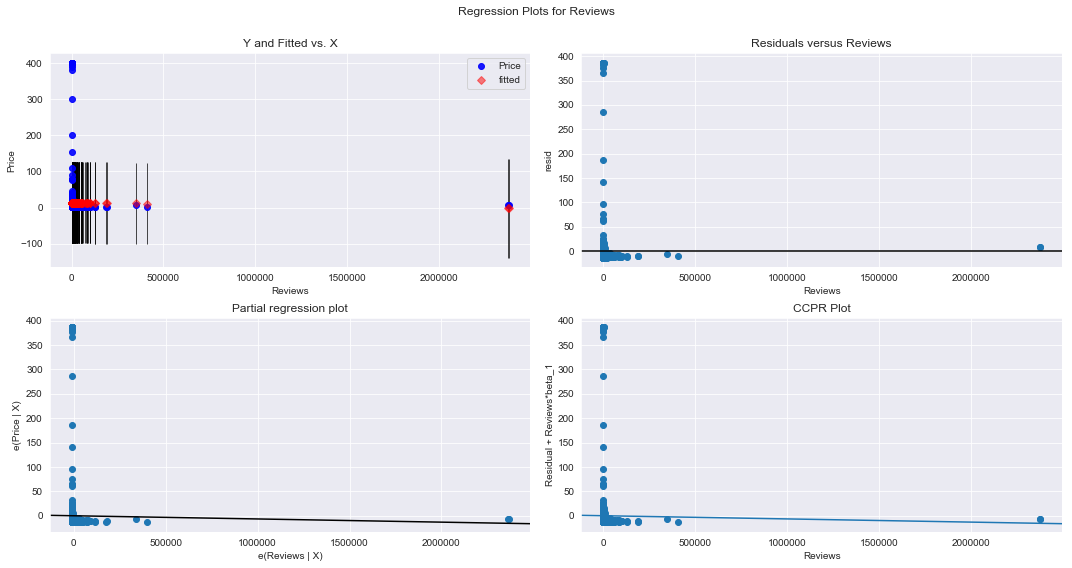

In [61]:
fig = plt.figure(figsize=(15,8))


fig = sm.graphics.plot_regress_exog(apps_modelo2, 'Reviews', fig=fig)

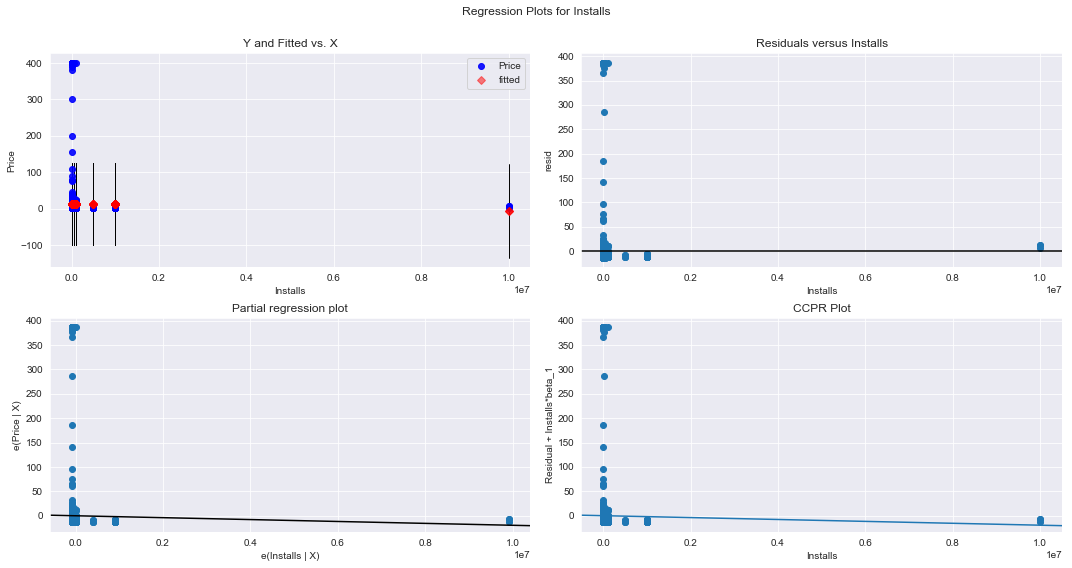

In [62]:
fig = plt.figure(figsize=(15,8))


fig = sm.graphics.plot_regress_exog(apps_modelo3, "Installs", fig=fig)

In [63]:
apps_sin_precio['New_Price'] = apps_sin_precio['Installs'] * apps_modelo3.params.Installs + apps_modelo3.params.Intercept

/Users/infzer0/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
apps_sin_precio['New_Price'].head(20)

0     14.079246
1     13.123272
2      4.343921
3    -83.449592
4     13.903659
5     14.001208
6     14.001208
7     12.147789
8     12.147789
9     14.079246
10    12.147789
11    12.147789
12    -5.410914
13    13.903659
14    13.903659
15    14.089001
16    13.123272
17    14.079246
18     4.343921
19    -5.410914
Name: New_Price, dtype: float64

In [65]:
apps_con_precio['Price'].head(20)

234     4.99
235     4.99
290     4.99
291     4.99
427     3.99
476     3.99
477     6.99
478     1.49
479     2.99
480     3.99
481     7.99
571     3.99
851     3.99
852     5.99
853     3.99
854     3.99
995     4.99
1001    2.99
1227    3.49
1228    4.99
Name: Price, dtype: float32

**$\color{red}{\text{NOTA}}$**: Con los datos obtenidos para la columna `apps_sin_precio['New_Price']` se ha podido observar que la predicción del precio no está relacionado con ninguna de las variables trabajadas; ni siquiera `Installs` que tiene el mejor coeficiente de correlación.

El precio puede ser asignado de forma arbitraria por el desarrollador acorde a otros aspectos; como por ejemplo:

- Horas de trabajo invertidas
- Portabilidad desde otra plataforma de desarrollo (iOS, Windows Phone)
- Licencias pagadas a terceros
- Uso de infraestructura (almacenamiento, cómputo) en la nube.

# 5.0 Representación de Resultados

En la sección **4.3.3** se representan los resultados como gráficas para los modelos obtenidos a partir de las regresiones lineales de mínimos cuadrados aplicadas a las variables seleccionadas.

# 6.0 Conclusiones

Se ha podido realizar esta práctica para la comprobación si el número de *Reviews*, *Instalaciones*, o *Rating* influyen en la determinaciòn del precio de una aplicación.

La conclusión que se ha podido obtener es que el precio de una aplicación móvil en la Play Store **no** está influenciado por esas variables. En su lugar, pueden existir otros factores como:

- Horas de trabajo invertidas
- Portabilidad desde otra plataforma de desarrollo (iOS, Windows Phone)
- Licencias pagadas a terceros
- Uso de infraestructura (almacenamiento, cómputo) en la nube.
- Otros

que influyen en el establecimiento del precio de una app.

En la sección **4.3.3** se encontró que ninguno de los modelos de regresión lineal determinan el precio de una aplicación.

Por otra parte, la práctica ha resultdo interesante ya que ha permitido aplicar técnicas de limpieza de datos, así como de optimización de tipos de datos. Contar con datos en un estado apto para procesamiento facilita tareas de análisis y extracción de observaciones o conclusiones interesantes.

También vale destacar el uso de detección de valores extremos (_outliers_): en la sección *3.2 Identificación y tratamiento de valores extremos (outliers)* se detectaron valores extremos sólo sobre la columa `Rating`. Trabajar con datos dentro del rango válido para una variable facilita tareas de análisis.

# 7.0 Recursos

- Megan Squire (2015). Clean Data. Packt Publishing Ltd.
- Harish Garg (2018). Mastering Exploratory Analysis with pandas. Packt Publishing Ltd.
- Alvaro Fuentes (2018). Become a Python Data Analyst. Packt Publishing Ltd.
- Srinivasa Rao Poladi (2018). Matplotlib 3.0 Cookbook. Packt Publishing Ltd.